# Dealing with Data, Homework 3 (due week 5)
## Natural Experiments and Instrumental Variables!


Due Tuesday 31 October at 14:20 on Blackboard.

Please just hand in this completed .ipynb file.

<font color="red">**IMPORTANT: Please name your file with your name(s). (e.g., "Mary_Isaac_HW3.ipynb")** </font> 

You may hand this in in pairs.  If you do, only one member of each pair needs to hand it in, just make it clear who your partner is.

**I collaborated with Umut on this HW**

# Overview and Background

## Our question, strategy, and some terminology

What is the effect of having children on women's labor force participation?  That is, if a woman has many children, does that make her less likely to be employed?  Or the opposite?

This is an example of a question where an RCT seems impossible or unethical.  However, we can still look for **natural experiments.**  A natural experiment is when something happens that we think is *pretty* random, and that generates variation in the variable we care about (in this case number of children).  The thing that we think is "pretty random" is called an **instrumental variable.** We'll talk more about instrumental variables in Class 4, but you can get started on this assignment after Class 3.

Our assignment today uses data from both the US and Turkey, and follows an idea from a 1998 paper by Angrist and Evans (citation below).  The basic idea is this: it turns out that if a woman has two children of the *same* sex, she is more likely to have a third child.  Since whether or a woman's first two children are the same sex as each other seems pretty random (uncorrelated with anything relevant about the woman), we can use this as an **instrument** for number of children.  That is, if a woman randomly has two boys or two girls, rather than a boy and a girl, as her first two children, we think that she's (randomly) more likely to have a third child.  We can use this random variation and *pretend* we have an RCT, even when we don't!  Then we'll use our analysis of RCTs (and in particular how to compute the Local Average Treatment Effect, or LATE) on this natural experiment.

In the jargon above, our **instrumental variable** is whether or not a women has two same-sex or two different-sex children as her first two children.

<font color="blue">**NOTE:** We'll talk more about instrumental variables and natural experiments (and this particular paper by Angrist and Evans) in Class 4.  We think that you can get started on this HW after Class 3, but if it's incomprehesible, you may want to wait until after Class 4.</font>

## Data Source

We've included data from both the US and Turkey.  The data come from the population censuses in 2000 in both the U.S. and Turkey.  The original data this is based on is downloadable from IPUMS (https://www.ipums.org/), and we've used a version from (Aaronson et al., 2021), cited below.  

The data only includes women with one or more children, where the women are between the ages of 18 and 35.

## (Optional) References

Here are some papers that this problem set is based on, if you'd like to do additional (optional) reading.  We'll post these papers with the assignment on Blackboard if you are interested!

Angrist, Joshua and Willian Evans.  “Children and Their Parents’ Labor Supply: Evidence from Exogenous Variation in Family Size.’’  1998. American Economic Review 88(3): 450-477.

Aaronson, Daniel, Rajeev Dehejia, Andrew Jordan, Cristian Pop-Eleches, Cyrus Samii and Karl Schulze.    “The Effect of Ferility on Mother’s Labour Supply over the last two centuries.’’ 2021.  Economic Journal.  131: 1-32. 

# Part 0: What's the "experiment"?

Read the blurb above and think about the "natural experiment" we are trying to run.  Based on the description above, explain (in words):
1. Who is the treatment group in this experiment?
2. Who is the control group in this experiment?
3. If we were to estimate the LATE from this experiment, what would we do, mechanically?
4. If we were to estimate the LATE from this experiment, then we should interpret it as the average treatment effect among the population of **compliers.** What does it mean to be a "complier" in this experiment?

# <font color="red">TODO: Double-click this box and write your answers below</font> 
<font color="red">You can turn it back into a nice text cell by hitting Shift+Enter when you are done.</font>

1. **ANSWER:** Treatment group is women  with at least two children whose first two children are same sex
2. **ANSWER:** Control group is women with at least two children whose first two children are different sex
3. **ANSWER:** I would do the followings:
- Calculate the average effect of having at least three children on whether the woman works. E[Yj|Zj = 1] - E[Yj|Zj = 0]
- Calculate the average effect of having two children of same biological sex on having at least three children E[Dj|Zj = 1]- E[Dj|Zj = 0]
- Calculate the LATE (ATE for compliers) = (E[Yj|Zj = 1] - E[Yj|Zj = 0])/(E[Dj|Zj = 1] - E[Dj|Zj = 0])
- As a result, we calculated the average effect of having at least three children on whether the woman works = Average treatment effect of having children on whether the woman works  
4. **ANSWER:** Compliers are women who have at least three children if they have two children of the same sex and women who do not have three children if they have not had two children of the same biological sex.         

# Part 1: Load the data

Run the following cell (Shift+Enter) to load the data.  We'll also go ahead and load numpy and pyplot now so that we don't have to do it later.

In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt

datafile = open('week4.csv', newline='')
dataDict = csv.DictReader(datafile, delimiter=",")
print("Great! Data is loaded")

Great! Data is loaded


Next, run the following cell to print out the attributes

In [2]:
for x in dataDict.fieldnames:
    print(x)

sex1
age1
sex2
age2
sex3
age3
sex4
age4
sex5
age5
sex6
age6
spouse_age
spouse_empstat
spouse_education
nchild
age
empstat
education
married
marr_divorce
marr_separate
marr_single
marr_widow
same_sex
two_boys
two_girls
country
two_or_more
three_or_more
low_educ


Here's what all of these mean.  Everything is calculated at the time of the survey, which was in the year 2000. 


**Here are the most important ones for our purposes:**

* country: either "Turkey" or "USA"
* empstat: mother is currently employed (aka, 1 if she is employed, 0 otherwise)
* three_or_more: equals 1 if there are three or more children, 0 otherwise
* same_sex: equals 1 if first and second child have the same gender, 0 if different gender, and blank if <2 children.
* nchild: number of children at the time of the survey

**NOTE:** If a women doesn't have two or more children, then the "same_sex" variable will be blank.  (We will set it to the Python primitive None below).

**And here are a bunch of other variables that might be interesting to look at!**

* age: age of the mother
* age1-age6: age of the 1st through 6th child in the data
* education: mother’s years of education at the time of the survey
* low_educ: an indicator for whether the mother has “low” education (the bottom 70% of education in Turkey, and the bottom 73% in the U.S.; in Turkey this is 5 years or less, in the U.S. this is 13 years or less)
* married: mother is married
* marr_divorce: mother is divorced
* marr_separate: mother is separated
* marr_single: mother is single
* marr_widow:  mother is a widow
* sex1-sex6: sex of the first 6 children  (In the original data, "1"=male; "2"=female; below we'll change that to "F" and "M" so we don't forget)
* spouse_age: age of spouse
* spouse_education: spouse years of education
* spouse_empstat: spouse is employed (1=employed; 0= not employed)
* two_boys: first two children are boys
* two_girls: first two children are girls 
* two_or_more: equals 1 if there are two or more children, 0 otherwise


Just like in the last HW assignment, we'll make a list-of-dicts data structure called "records" to store our data, and we'll cast the values to be useful types (integers, floats, etc).  Run the following cell to do that.

**NOTE: It may take a few minutes for the following cell to run; this data set has over a million observations!  Be patient :)** 

In [3]:
print("Please wait...")
records = [ row for row in dataDict ]
toRemove = []
for i in range(len(records)): # this is a for-loop over the numbers 0, 1, ..., len(records)-1
    x = records[i]
    for k in x.keys():
        if x["empstat"]=="":
            toRemove.append(i) # get rid of anyone where we don't have employment status
        if k in ["age", "age1", "age2", "age3", "age4", "age5", "age6", "empstat", "low_educ", "married", "marr_divorce", "marr_separate", "marr_single", "marr_widow", "nchild", "same_sex", "spouse_age", "spouse_empstat", "three_or_more", "two_boys", "two_girls", "two_or_more"]:
            if x[k] == "":
                x[k] = None 
            else:
                x[k] = int(x[k]) # cast the value as an integer
        if k in ["education","spouse_education"]:
            if x[k] == "":
                x[k] = None
            else:
                x[k] = float(x[k]) # cast the value as an float
        if k in ["sex1", "sex2", "sex3", "sex4", "sex5", "sex6"]:
            if x[k] == "1":
                x[k] = "M"
            elif x[k] =="2":
                x[k] = "F"
            elif x[k] =="":
                x[k] = None

toRemove.reverse()
for i in toRemove:
    records.pop(i)
    
print("...done!")

Please wait...
...done!


Now run the following cell to see what an arbitrary person in the dataset looks like.  Take a look and make sure you understand what info we have.

In [4]:
print("This is a 25-year-old Turkish woman with 2 children, who is not working:")
for k in records[2].keys():
    print(k, "\t", records[2][k])

This is a 25-year-old Turkish woman with 2 children, who is not working:
sex1 	 M
age1 	 2
sex2 	 F
age2 	 0
sex3 	 None
age3 	 None
sex4 	 None
age4 	 None
sex5 	 None
age5 	 None
sex6 	 None
age6 	 None
spouse_age 	 29
spouse_empstat 	 0
spouse_education 	 12.0
nchild 	 2
age 	 25
empstat 	 0
education 	 12.0
married 	 1
marr_divorce 	 0
marr_separate 	 None
marr_single 	 0
marr_widow 	 0
same_sex 	 0
two_boys 	 0
two_girls 	 0
country 	 Turkey
two_or_more 	 1
three_or_more 	 0
low_educ 	 0


# Part 2: Observational Comparison

Before we get into the "natural experiment," let's compute some observational comparisons as a baseline!

## Observational Comparison for the US
We'll compute how the average employment rate varies when women go from two children to three or more children.  Let's do it first for the US.  Run the following cell to do that:

In [5]:
## Compute the observational comparison: 
## how does having 2 vs at least 3 children relate to the employment rate among US women?

## Compute the average employment rate among US women with two children
#empstat = Yj
#nchild = Dj if nchild == 2 Dj = 0 and nchild >= 3 == Dj 1
US_empl_2child = np.mean( [ x["empstat"] for x in records if (x["country"]=="USA" and x["nchild"]==2)])
US_empl_3child = np.mean( [ x["empstat"] for x in records if (x["country"]=="USA" and x["nchild"]>=3)])

print("The average employment rate among US women with 2 children is", US_empl_2child)
print("The average employment rate among US women with at least 3 children is", US_empl_3child)
print("The observational comparison for US women is", US_empl_3child-US_empl_2child)

The average employment rate among US women with 2 children is 0.6140982331966004
The average employment rate among US women with at least 3 children is 0.5195501874219075
The observational comparison for US women is -0.09454804577469289


## <font color="red">TODO: Below, fill in code to compute the observational comparison for Turkey.</font>

Do the same thing for Turkey that we just did for the USA.  

**Hint:** To do this we need to look at records x with x["country"] equal to "Turkey".  It's okay to copy-and-paste the code above and just tweak that!

In [6]:
## TODO: Compute the observational comparison: 
## how does having 2 vs least 3 children relate to the employment rate among Turkish women?
TR_empl_2child = np.mean( [ x["empstat"] for x in records if (x["country"]=="Turkey" and x["nchild"]==2)])
TR_empl_3child = np.mean( [ x["empstat"] for x in records if (x["country"]=="Turkey" and x["nchild"]>=3)])

print("The average employment rate among Turkish women with 2 children is", TR_empl_2child)
print("The average employment rate among Turkish women with at least 3 children is", TR_empl_3child)
print("The observational comparison for Turkish women is", TR_empl_3child-TR_empl_2child)


The average employment rate among Turkish women with 2 children is 0.3255562380249539
The average employment rate among Turkish women with at least 3 children is 0.39374296699174793
The observational comparison for Turkish women is 0.06818672896679401


## <font color="red">TODO: What did you find?</font>

<font color="red">Double-click this box and and write a paragraph or so about how you would interpret the numbers you just found.  Are you surprised?  Is this expected?  Do you think that the relationship in either the US or Turkey is causal?  if so, why or why not?</font>

**ANSWER:** I am surprised to see considerable differences in the values of the average employment rate and the observational comparisons. Turkey is really behind the US in terms of women's participation in the workforce, which is very sad. Moreover, the correlational relationship in Turkey and the US is opposite (Observ. Comp. TR x Observ. Comp. US < 0). There is a positive correlation between the number of children and employment rate among Turkish women. On the other hand, there is a negative correlation in the US. It is very surprising to see such a drastic contrast. I expected to see the same type of "correlation" but to a different extent. There could be several reasons to see differences in observational comparisons. In the case of Turkey, having three children or more could be financially challenging, which leads to higher workforce participation among Turkish mothers. In contrast, in the US, having three children or more might be time-consuming, which results in a decrease in women's participation in the workforce. Therefore, there might not be a strong correlation between the number of children and women's workforce participation due to selection effects.

## <font color="violet">Optional TODO: Do some more data analysis to investigate further! </font>


<font color="violet">1. OPTIONALLY look at a more nuanced version of the observational comparison above.  What about when women go from 1 to 2 children, or 3 to 4?  More generally, how does the average probability of working vary with the number of children in each country?  It might be interesting to make a graph with number of children on the x-axis and employment rate on the y-axis, for both the US and Turkey.</font>

<font color="violet">2. Our data set has tons of other information.  If you said above that the relationship (in either the US or Turkey) might not be causal, OPTIONALLY investigate this by looking at some of this other information.  For example, perhaps you think that age, or being married, or etc, is a confounding variable in the US/Turkish case; look at the data and check if the correlations you see are consistent with that!</font>


    
**OPTIONAL ANSWER:** First I would make the graph then look for confounding variables


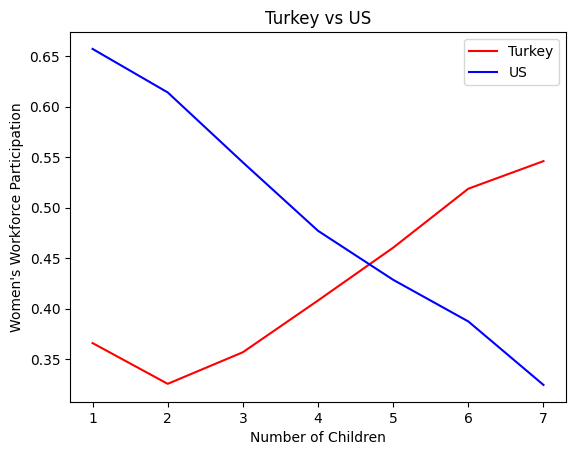

In [7]:
# OPTIONAL: Write some code here to investigate.
#graph x: number of children
#graph y: fraction of women who are employed in the Country
num_of_children = ["1","2","3","4","5","6","7"]
tr_emp_of_corresp_mothers = []
us_emp_of_corresp_mothers = []
for idx,num in enumerate(num_of_children):
    tr_mean = np.mean([record["empstat"] for record in records if (record['nchild'] == int(num) and record["country"] == "Turkey")])
    us_mean = np.mean([record["empstat"] for record in records if (record['nchild'] == int(num) and record["country"] == "USA")])
    tr_emp_of_corresp_mothers.append(tr_mean)
    us_emp_of_corresp_mothers.append(us_mean)
plt.plot(num_of_children,tr_emp_of_corresp_mothers,label="Turkey",color="red")
plt.plot(num_of_children,us_emp_of_corresp_mothers,label="US",color="blue")
plt.title("Turkey vs US")
plt.ylabel("Women's Workforce Participation")
plt.xlabel("Number of Children")
plt.legend()
plt.show()

**OPTIONAL ANSWER:** TODO: Double-click this cell to describe in words what you found above.


# Part 3: Natural Experiment

We will break our analysis of the natural experiment into five parts:

* **Part 3a:** Is our instrumental variable good?  That is, is it the case that whether or not women have same-sex or different-sex first two children seems pretty random? 
* **Part 3b:** What is the "effect" of same-sex vs different-sex first-two-children on the decision to have a third child?
* **Part 3c:** What is the "effect" of same-sex vs different-sex first-two-children on whether or not a woman is working?
* **Part 3d:** Computing the LATE for this natural experiment.
* **Part 3e:** What population does the LATE apply to?

## Part 3a: Is our Instrumental Variable Good?

We think that whether or not a woman has two same-sex or two different-sex children as her first two children is pretty random.  To sanity-check this, we can check to see if things look approximately balanced between the treatment and control groups.

We'll do it first for age below, in the US.  Then you'll do it for age in Turkey, and optionally a few more variables of your choosing.

In [8]:
US_treatment_age_mean = np.mean( [ x["age"] for x in records if (x["country"]=="USA" and x["same_sex"]==1)]) 
US_control_age_mean = np.mean( [ x["age"] for x in records if (x["country"]=="USA" and x["same_sex"]==0)]) 

print("Average age among US women whose first two children were same-sex:\t", US_treatment_age_mean)
print("Average age among US women whose first two children were not same-sex:\t", US_control_age_mean)

Average age among US women whose first two children were same-sex:	 30.096934938723567
Average age among US women whose first two children were not same-sex:	 30.105130493256475


### <font color="red"> TODO: Repeat the above for Turkish population. </font>

Hint: It's okay to copy-paste -- you just need to change the "country" variable to be "Turkey".

In [9]:
# TODO: repeat the above for Turkish women. 
TR_treatment_age_mean = np.mean( [ x["age"] for x in records if (x["country"]=="Turkey" and x["same_sex"]==1)]) 
TR_control_age_mean = np.mean( [ x["age"] for x in records if (x["country"]=="Turkey" and x["same_sex"]==0)]) 

print("Average age among Turkish women whose first two children were same-sex:\t", TR_treatment_age_mean)
print("Average age among Turkish women whose first two children were not same-sex:\t", TR_control_age_mean)

Average age among Turkish women whose first two children were same-sex:	 29.372027972027972
Average age among Turkish women whose first two children were not same-sex:	 29.355948899811278


### <font color="violet"> OPTIONAL TODO: Repeat the above (in both the US and in Turkey) for other variables

In [10]:
# TODO (optional): repeat the above for other variables in both the US and in Turkey
#married
TR_treatment_mean = np.mean( [ int(x["married"]) for x in records if (x["country"]=="Turkey" and x["same_sex"]==1) and not x["married"] == None]) 
TR_control_mean = np.mean( [ int(x["married"]) for x in records if (x["country"]=="Turkey" and x["same_sex"]==0) and not x["married"] == None]) 

print("Mean of marriage among Turkish women whose first two children were same-sex:\t", TR_treatment_mean)
print("Mean of marriage among Turkish women whose first two children were not same-sex:\t", TR_control_mean)
print()

#years of education
TR_treatment_mean = np.mean( [ x["education"] for x in records if (x["country"]=="Turkey" and x["same_sex"]==1) and not x["education"] == None]) 
TR_control_mean = np.mean( [ x["education"] for x in records if (x["country"]=="Turkey" and x["same_sex"]==0) and not x["education"] == None]) 

print("Average years of education among Turkish women whose first two children were same-sex:\t", TR_treatment_mean)
print("Average years of education among Turkish women whose first two children were not same-sex:\t", TR_control_mean)
print()
#spouse age
TR_treatment_mean = np.mean( [ x["spouse_age"] for x in records if (x["country"]=="Turkey" and x["same_sex"]==1) and not x["spouse_age"] == None]) 
TR_control_mean = np.mean( [ x["spouse_age"] for x in records if (x["country"]=="Turkey" and x["same_sex"]==0) and not x["spouse_age"] == None]) 

print("Average spouse age among Turkish women whose first two children were same-sex:\t", TR_treatment_mean)
print("Average spouse age among Turkish women whose first two children were not same-sex:\t", TR_control_mean)
print()

Mean of marriage among Turkish women whose first two children were same-sex:	 0.9846249655439965
Mean of marriage among Turkish women whose first two children were not same-sex:	 0.986042701452762

Average years of education among Turkish women whose first two children were same-sex:	 6.228625592417061
Average years of education among Turkish women whose first two children were not same-sex:	 6.202581837313452

Average spouse age among Turkish women whose first two children were same-sex:	 34.13621328175654
Average spouse age among Turkish women whose first two children were not same-sex:	 34.16629943691438



In [11]:
# TODO (optional): repeat the above for other variables in both the US and in Turkey
#married
TR_treatment_mean = np.mean( [ int(x["married"]) for x in records if (x["country"]=="USA" and x["same_sex"]==1) and not x["married"] == None]) 
TR_control_mean = np.mean( [ int(x["married"]) for x in records if (x["country"]=="USA" and x["same_sex"]==0) and not x["married"] == None]) 

print("Mean of marriage among US women whose first two children were same-sex:\t", TR_treatment_mean)
print("Mean of marriage among US women whose first two children were not same-sex:\t", TR_control_mean)
print()

#years of education
TR_treatment_mean = np.mean( [ x["education"] for x in records if (x["country"]=="USA" and x["same_sex"]==1) and not x["education"] == None]) 
TR_control_mean = np.mean( [ x["education"] for x in records if (x["country"]=="USA" and x["same_sex"]==0) and not x["education"] == None]) 

print("Average years of education among US women whose first two children were same-sex:\t", TR_treatment_mean)
print("Average years of education among US women whose first two children were not same-sex:\t", TR_control_mean)
print()
#spouse age
TR_treatment_mean = np.mean( [ x["spouse_age"] for x in records if (x["country"]=="USA" and x["same_sex"]==1) and not x["spouse_age"] == None]) 
TR_control_mean = np.mean( [ x["spouse_age"] for x in records if (x["country"]=="USA" and x["same_sex"]==0) and not x["spouse_age"] == None]) 

print("Average spouse age among US women whose first two children were same-sex:\t", TR_treatment_mean)
print("Average spouse age among US women whose first two children were not same-sex:\t", TR_control_mean)
print()

Mean of marriage among US women whose first two children were same-sex:	 0.7474526688097579
Mean of marriage among US women whose first two children were not same-sex:	 0.7489564345799729

Average years of education among US women whose first two children were same-sex:	 12.369596476295152
Average years of education among US women whose first two children were not same-sex:	 12.377703014180648

Average spouse age among US women whose first two children were same-sex:	 33.5447464579291
Average spouse age among US women whose first two children were not same-sex:	 33.55292224292732



### <font color="red"> TODO: What is your take-away?  Does this instrumental variable seem pretty "random"? </font>

<font color="red">Double-click this cell and write in your answer. </font>

**ANSWER:** This instrumental variable is pretty "random". The means of investigated variables are almost exactly the same !

## Part 3b: Effect of same-sex vs different-sex on having a third child.

In both the US and the Turkish population, compute the observational comparison of having two same-sex children on having a third child.  We'll do it first for the US population.

In [12]:
US_treatment_mean = np.mean( [ x["three_or_more"] for x in records if (x["country"]=="USA" and x["same_sex"]==1)]) 
US_control_mean = np.mean( [ x["three_or_more"] for x in records if (x["country"]=="USA" and x["same_sex"]==0)]) 
US_effect_on_3ormore = US_treatment_mean - US_control_mean

print("In the US:")
print("\t Fraction of treatment group with at least 3 children:", US_treatment_mean)
print("\t Fraction of control group with at least 3 children:", US_control_mean)
print("\t Effect of treatment on having at least 3 children:", US_effect_on_3ormore)

In the US:
	 Fraction of treatment group with at least 3 children: 0.39961903660058345
	 Fraction of control group with at least 3 children: 0.3525495984334888
	 Effect of treatment on having at least 3 children: 0.047069438167094635


### <font color="red">TODO: Do the same for the Turkish population.</font>

In [13]:
# TODO: Compute the observational effect of having the first two children
# same-sex on having a third child, among Turkish women.
#three_or_more = Dj
#same_sex = Zj
TR_treatment_mean = np.mean( [ x["three_or_more"] for x in records if (x["country"]=="Turkey" and x["same_sex"]==1)]) 
TR_control_mean = np.mean( [ x["three_or_more"] for x in records if (x["country"]=="Turkey" and x["same_sex"]==0)]) 
TR_effect_on_3ormore = TR_treatment_mean - TR_control_mean
#E[Dj | Zj = 1] - E[Dj | Zj = 0]
print("In the Turkey:")
print("\t Fraction of treatment group with at least 3 children:", TR_treatment_mean)
print("\t Fraction of control group with at least 3 children:", TR_control_mean)
print("\t Effect of treatment on having at least 3 children:", TR_effect_on_3ormore)

In the Turkey:
	 Fraction of treatment group with at least 3 children: 0.4721249553366342
	 Fraction of control group with at least 3 children: 0.40507891080279557
	 Effect of treatment on having at least 3 children: 0.06704604453383861


### <font color="red">TODO: Interpret your answers!  That is, write a **sentence or two** (understandable by a non-technical person) which explains what the numbers you computed mean.

**ANSWER:** TODO: In both countries, families tend to have 3 or more children if the first two children have the same biological sex. This behavior is more common among Turkish families.

## Part 3c: Effect of same-sex vs different-sex on whether or not a woman works

### <font color="red">TODO: Write code to do exactly the same thing as above, except the outcome that we are interested in is whether a woman is working at the time of the census (the "empstat" variable), not whether she had at least 3 children. </font>

**Hint:** Modify the code you had above.

In [14]:
## TODO: Find the effect of same_sex on whether or not a woman works, in both the US and Turkish populations
#empstat = Yj
US_treatment_mean = np.mean( [ x["empstat"] for x in records if (x["country"]=="USA" and x["same_sex"]==1)]) 
US_control_mean = np.mean( [ x["empstat"] for x in records if (x["country"]=="USA" and x["same_sex"]==0)]) 
US_effect_on_empstat = US_treatment_mean - US_control_mean

print("In the US:")
print("\t Fraction of treatment group who has a job:", US_treatment_mean)
print("\t Fraction of control group who has a job:", US_control_mean)
print("\t Effect of treatment on employement:", US_effect_on_empstat)

In the US:
	 Fraction of treatment group who has a job: 0.5768413919625813
	 Fraction of control group who has a job: 0.5802266027769202
	 Effect of treatment on employement: -0.003385210814338846


In [15]:
## TODO: Find the effect of same_sex on whether or not a woman works, in both the US and Turkish populations
#empstat = Yj
TR_treatment_mean = np.mean( [ x["empstat"] for x in records if (x["country"]=="Turkey" and x["same_sex"]==1)]) 
TR_control_mean = np.mean( [ x["empstat"] for x in records if (x["country"]=="Turkey" and x["same_sex"]==0)]) 
TR_effect_on_empstat = TR_treatment_mean - TR_control_mean
#E[Yj | Zj = 1] - E[Yj | Zj = 0]
print("In the Turkey:")
print("\t Fraction of treatment group who has a job:", TR_treatment_mean)
print("\t Fraction of control group who has a job:", TR_control_mean)
print("\t Effect of treatment on employement:", TR_effect_on_empstat)

In the Turkey:
	 Fraction of treatment group who has a job: 0.3550405798580981
	 Fraction of control group who has a job: 0.35592816109832226
	 Effect of treatment on employement: -0.0008875812402241445


## Part 3d: Computing the Local Average Treatment Effect (LATE) for this "experiment"

Recall that for this natural experiment, our "treatment" group is women with at least two children whose first two children are same sex (that is, the value of "same_sex" is 1), and the "control group" is women with at least two children, whose first two children are different sex (that is, the value of "same_sex" is 0).

The outcome that we are interested in is whether or not the woman is working (the value of "empstat").

### <font color="red">TODO: Write code below to compute the LATE for this natural experiment, to estimate the effect of a third child on the probability that a woman will work, in both the US and Turkish populations.</font>

<font color="red">**Hint:** Recall that we compute the LATE by dividing one thing by another thing (what are they?) -- we've already computed both of these things above! </font>

In [16]:
## TODO: Write code to compute the LATE in the US population:
#LATE = (E[Yj | Zj = 1] - E[Yj | Zj = 0])/(E[Dj | Zj = 1] - E[Dj | Zj = 0]) 
#     = (Effect of same_sex on empstat)/(Effect of same_sex on three_or_more) 
#     = (Effect of three_or_more on empstat) 

TR_LATE = TR_effect_on_empstat / TR_effect_on_3ormore
US_LATE = US_effect_on_empstat / US_effect_on_3ormore
print(f"LATE for Turkey: {TR_LATE}")
print(f"LATE for US: {US_LATE}")

LATE for Turkey: -0.013238383358710684
LATE for US: -0.0719195075650039


### <font color="red">TODO: Double-click on this cell and answer the following questions:</font>
    
1. Use these numbers in a sentence to give them an interpretation.  In particular, if you believe that this natural experiment is valid, what do you conclude about the effect of having more children on women's labor supply, in the US and in Turkey?

**ANSWER:** I think this natural experiment is valid and gives us solid ideas about causal effect of having more children on women's labor supply. The effect of having three or more children In US, this effect is larger than Turkey.  


2. How do these numbers compare to the numbers you got for the observational comparison in Part 2?  If they are qualitatively different, do you have any thoughts about why that is?

**ANSWER:** There is a distinct qualitative difference in Turkey. In Part 2, the observational comparison for Turkey contradicts with our findings in this section. Furthermore, the observational comparison for the USA in Part 2 (-0.095) overestimates the LATE for the USA in Part 3 (-0.072). Overall, the treatment and the effect is negatively correlated.

## Part 3e: What's the population?

Recall that the LATE only computes the average treatment effect among a particular population, that of *compliers*.  You've already thought in Part 0 about what it means to be a "complier" in this setting.  But now we can explore who the compliers are, and what characteristics they have, in a bit more detail.

First, let's estimate how many compliers there are.

Recall that, if we assume monotonicity (that is, that there are no defiers), anyone in the control group (aka, anyone who had two different-sex children), but **did** have a third child must be an "always-taker."  Let's compute the number of always-takers in the control group, in the US:

In [17]:
# number of always takers in control group Zj = 0 (same_sex), Dj = 1 (three_or_more) == 1
num_AT_control = sum([x["three_or_more"] for x in records if (x["same_sex"]==0 and x["country"] == "USA")])
print("The number of Always-Takers in the US control group is", num_AT_control)

print("ASSUMPTION: The number of Always-Takers in the US treatment group is about the same, because sex of children is about 50/50.")

The number of Always-Takers in the US control group is 83360
ASSUMPTION: The number of Always-Takers in the US treatment group is about the same, because sex of children is about 50/50.


Next, we can compute the number of people in the treatment group (in the US) who did have a third child.  Recall that these folks are either "compliers" or "always-takers".

In [18]:
# number of folks in treatment group who had a third child
num_treat_3orMore = sum([x["three_or_more"] for x in records if (x["same_sex"]==1 and x["country"] == "USA")])
print("The number of people in the US treatment group with 3 or more children is", num_treat_3orMore)

The number of people in the US treatment group with 3 or more children is 96715


Finally, let's compute the number of people in the treatment group total (in the US), for comparison:

In [19]:
# number of folks in treatment group
num_treat = sum([1 for x in records if (x["same_sex"]==1 and x["country"] == "USA")])
print("The number of people in the US treatment group is", num_treat)

The number of people in the US treatment group is 242018


### <font color="red"> TODO: combine two of the three numbers we just computed (how?) to estimate the number of compliers in the treatment group. </font>

**Assumptions:** You may assume that the treatment group is exactly half the population, and that people are indeed randomly assigned to the treatment group.  (You should also assume that there are no "defiers").

**Hint:** We did something very similar to this towards the end of Class 3.

In [20]:
## TODO: Write code to compute the number of compliers in the treatment group ,
## and print out your answer. (Making the assumptions above).

#Q: What are we are looking for num_C_control + num_C_treatment

#1) Finding num_C_treatment
#number of always takers for control group = num_AT_control
#number of always takers for treatment group = num_AT_treatment = num_AT_control by the assumption
num_AT_treatment = num_AT_control
#number of compliers for treatment group num_C_treatment = num_treat3orMore - num_AT_treatment
num_C_treatment = num_treat_3orMore - num_AT_treatment
print("The number of compliers in the treatment group", num_C_treatment)

#2) Finding num_C_control
#number of people in treatment group num_treat = num_NT_treatment + num_AT_treatment + num_C_treatment
#number of never-takers in treatment group = num_NT_treatment = num_treat - num_AT_treatment - num_C_treatment
num_NT_treatment = num_treat - num_treat_3orMore
#number of never-takers in control group = num_NT_control = num_NT_treatment by the assumption
num_NT_control = num_NT_treatment
#num_control = num_AT_control/num_AT_treatment + num_NT_control/num_NT_treatment + num_C_control
num_control = num_treat
#num_C_control = num_control - num_AT_control/num_AT_treatment - num_NT_control/num_NT_treatment
num_C_control = num_control - num_AT_control - num_NT_control
print("The number of compliers in the control  group", num_C_control)
num_compliers = num_C_treatment + num_C_control
print("The number of compliers in the population", num_compliers)

The number of compliers in the treatment group 13355
The number of compliers in the control  group 13355
The number of compliers in the population 26710


### <font color="red"> TODO: Is this a big population? </font>

<font color="red">Double click on this cell and answer the following question: The LATE is computing the average treatment effect for a particular population, call it P.  On the other hand, the natural experiment is looking at a larger population, call it S, the population of women with at least two children.  Answer the following questions:
1. In the US data, approximately what fraction of folks in S are contained in P?  
2. Does this seem "big" or "small" to you?  
3. What does this fraction make you think about the LATE estimate you computed above?
 </font>
 
**Hint:** You've already computed all of the numbers you need to answer Question 1, although you may need to combine them.  (You can use the code cell below as scratch space if you want to do a computation).

**ANSWER:** 
1. 5.52% of people in S are contained in P. 
2. 5.52% of population is comparatively small.  
3. Our calculation of LATE is based on only 5% of the population, which is not sufficently representative to generalize the effect over the whole population.

In [22]:
# TODO: put any computations for your answer above here.
P = num_compliers
S = num_compliers + num_AT_treatment*2 + num_NT_treatment*2
print(P/S)

0.0551818459783983


# <font color="violet"> EVERYTHING FROM HERE ON IS OPTIONAL </font>

<font color="violet">
Below, we include a few more optional parts in case you want to investigate more about what the group of compliers look like.</font>


### OPTIONAL PART: Next question: among the population of compliers in the treatment group, how likely are these women to work?

#### (In particular, is the LATE that you computed a lot or a little relative to this mean?)

In Class 3, we asked this question, and we saw how we could answer it by combining the following building blocks:
1. Employment rate among always-takers
2. Employment rate among folks in the treatment group who had a third child
3. The numbers we computed above.

Below, we'll compute 1 and 2.

In [ ]:
emp_AT = np.mean( [ x["empstat"] for x in records if (x["country"]=="USA" and x["same_sex"]==0 and x["three_or_more"]==1) ])
emp_treat_3child = np.mean( [ x["empstat"] for x in records if (x["country"]=="USA" and x["same_sex"]==1 and x["three_or_more"]==1) ])

print("Thing 1: the employment rate among always-takers is approximately", emp_AT)
print("Thing 2: the employment rate among folks in treatment group who had a third child is approximately", emp_treat_3child)


### <font color="violet"> OPTIONAL TODO: More complier analysis! </font>

<font color="violet"> Figure out how to combine all the of the numbers we've computed above to estimate the average employment rate among compliers in the treatment group.  Explain here what the computation is that you will do, and why.  Then in the next cell, do the computation!
 </font>

**(optional) ANSWER:** TODO (optionally)


In [ ]:
## OPTIONAL TODO: Write the code that you described above, 
## and print out the average employment rate of compliers in the treatment group. 


Based on your answer above, do you think that the effect that you found is "big" or "small"?  Does the employment rate among compliers in the treatment group look like the employment rate among the general population in the treatment group?

**(optional) ANSWER CONTINUED:**


### ANOTHER OPTIONAL PART: Do the same thing for the Turkish data.

Above, we analyzed the compliers just for the US Data.  It's natural to ask if things look the same in the Turkish data!

### <font color="violet"> OPTIONAL TODO: Do the complier analysis we did above, but for the Turkish data </font> 

<font color="violet"> Use the box below to enter code, and put your conclusions in this box below by double-clicking on this cell.</font>

**OPTIONAL ANSWER:** (Optional TODO)


In [ ]:
## Optional TODO: Code for analyzing the fraction of population captured by the Turkish LATE goes here.


### <font color="violet">OPTIONAL TODO: What else can you say about the compliers?</font>

<font color="violet">In class, we saw how we can estimate summary statistics (e.g., average education; average age; etc) among the population of compliers.  Do that here too and see what you get!  How does it compare to the population in the experiment (eg, those with at least 2 children)?  How does it compare to the general population in the dataset?</font>

**ANSWER:** Fill in as much as you want below!  (This is all optional)

In [ ]:
# TODO (Optional): Write code to support the Optional TODO above.
